# Brincando de casinha

## O que queremos?
- Verificar a correlação entre o ano de contrução da casa e seu preço.

## O que temos que fazer?
- "Limpar" os dados (tirar os valores faltantes e os outliers)
- Analisar os dados (pensar usando a estatística)
- tirar conclusões  (...)

### Primeiros passos

In [62]:
import pandas as pd
import seaborn as sns

path = "./"
file = "kc_house_data.csv"
ds = pd.read_csv(f"{path+file}", sep=",")

In [2]:
ds.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Pre processamento (limpeza)

In [88]:
# reduzindo nossa "area de trabalho"
q1 = ds.loc[:, ("yr_built", "yr_renovated", "price")] # recomendado
#q1 = ds[["yr_built", "yr_renovated", "price"]] - não recomendado
q1.describe()

,yr_built,yr_renovated,price
count,21613.000000,21613.000000,2.161300e+04
mean,1971.005136,84.402258,5.400881e+05
std,29.373411,401.679240,3.671272e+05
min,1900.000000,0.000000,7.500000e+04
25%,1951.000000,0.000000,3.219500e+05
50%,1975.000000,0.000000,4.500000e+05
75%,1997.000000,0.000000,6.450000e+05
max,2015.000000,2015.000000,7.700000e+06


In [89]:
# retirando linhas que tem algum valor faltando
q1.dropna(inplace=True)
# ds = ds.dropna()
q1.isna().sum()

yr_built        0
yr_renovated    0
price           0
dtype: int64

<AxesSubplot: >

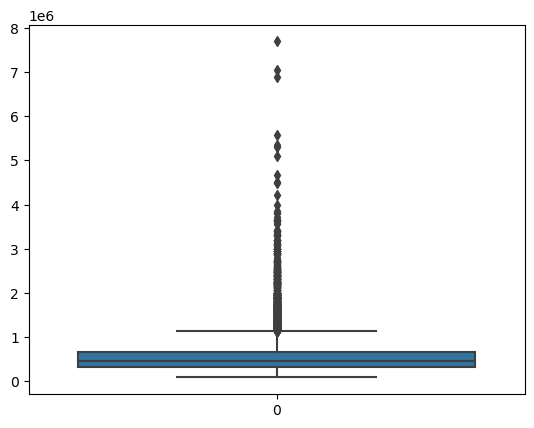

In [70]:
# procurando outliers no preço (valores muito maiores ou menores que o "normal" da amastra)
sns.boxplot(q1.price)

In [90]:
# existem varias formas de definir um intervalo valido
print(f"intervalo antes: [{q1.price.min()}, {q1.price.max()}]")


# algumas vezes, aliás, não é necessário redimensionar o intervalo dos dados
# em outras você não Deve. Aqui vou fazer.
muitoAbaixo = q1["price"].quantile(0.15)
muitoAcima  = q1["price"].quantile(0.85)

q1 = q1.loc[(q1["price"] < muitoAcima) & (q1["price"] > muitoAbaixo)]
print(f"intervalo depois: [{df_filtered.price.min()}, {df_filtered.price.max()}]")

intervalo antes: [75000.0, 7700000.0]
intervalo depois: [270500.0, 779380.0]


<AxesSubplot: xlabel='price'>

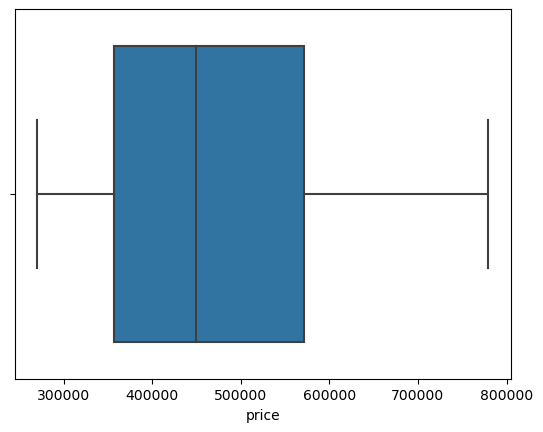

In [76]:
sns.boxplot(data = q1, x = "price")

### Analisando

In [91]:
# Vamos discretizar, separar os preços em faixas bem definidas
faixas = ["barato", "medio", "caro"]
q1["classification"] = pd.cut(q1.price, 3, labels=faixas)
# 3 intervalos igualmente espaçados
q1.head()

,yr_built,yr_renovated,price,classification
1,1951,1991,538000.0,medio
3,1965,0,604000.0,medio
4,1987,0,510000.0,medio
7,1963,0,291850.0,barato
9,2003,0,323000.0,barato


<AxesSubplot: xlabel='classification', ylabel='Count'>

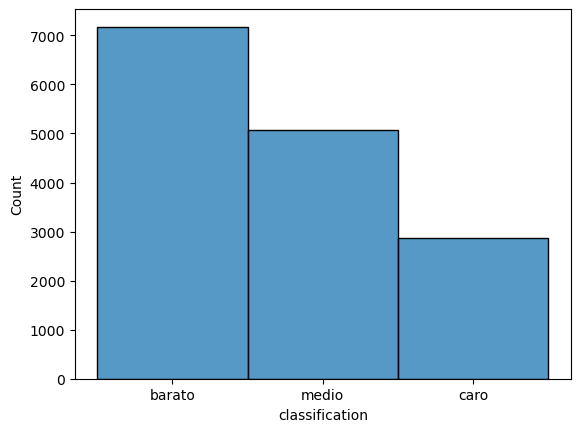

In [80]:
sns.histplot(data=q1, x="classification")
#eixo y é o número de elementos dentro desse intervalo

In [122]:
# criando outras colunas para filtra
q1.loc[q1["yr_renovated"] > 0, "isRenovated"] = 1
# 0 = não renovada, 1 = renovada

q1["idadeCasa"] = pd.cut(q1.yr_built, 3, labels=["velha", "adulta", "nova"])

q1.head(10)

,yr_built,yr_renovated,price,classification,isRenovated,idadeCasa
1,1951,1991,538000.0,medio,1,adulta
3,1965,0,604000.0,medio,0,adulta
4,1987,0,510000.0,medio,0,nova
7,1963,0,291850.0,barato,0,adulta
9,2003,0,323000.0,barato,0,nova
10,1965,0,662500.0,caro,0,adulta
11,1942,0,468000.0,medio,0,adulta
12,1927,0,310000.0,barato,0,velha
13,1977,0,400000.0,barato,0,nova
14,1900,0,530000.0,medio,0,velha


<AxesSubplot: xlabel='idadeCasa', ylabel='price'>

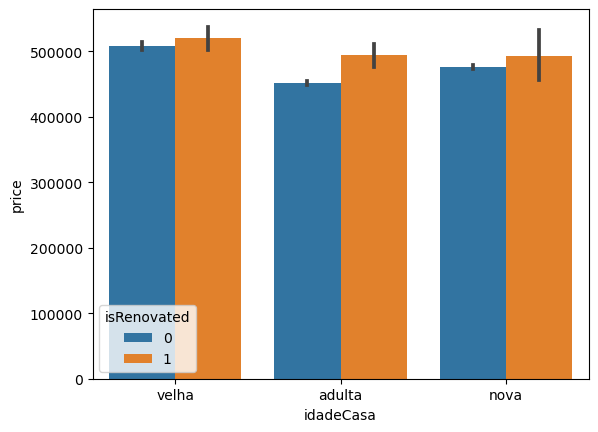

In [119]:
sns.barplot(data=q1, x="idadeCasa", y="price", hue="isRenovated")

<AxesSubplot: >

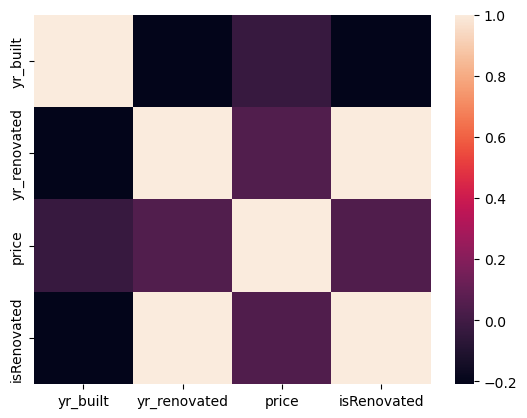

In [124]:
sns.heatmap(q1.corr(numeric_only=True))

### conclusões

- Pelos gráficos (não mostraram tendência) e pelo valor da correlação (perto de 0) podemos afirmar que o preço não varia de acordo com a idade da casa, ao menos não diretamente
- 